In [ ]:
from google.colab import drive
import pandas as pd

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install librosa soundfile
!pip install mutagen
!pip install librosa pydub

# Case df

In [ ]:
# Step 2: Import necessary libraries
import os
import pandas as pd

# Step 3: Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CASES'

# Step 4: List all files in the directory
files = os.listdir(folder_path)

# Step 5: Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Step 6: Create a DataFrame with the MP3 files
case_df = pd.DataFrame(mp3_files, columns=['File Name'])

# Step 7: Display the DataFrame
case_df

,File Name
0,"ACPA 2 more in grammar school, and out little ..."
1,ACPA and I started out on the switch board and...
2,ACPA playing in the snow is fun-3.mp3
3,Facebook (pick up the baby).mp3
4,"ACPA oh let me see, what can I tell you about ..."
...,...
91,Video 3_5 (muddy).mp3
92,Video 6_1 (mom).mp3
93,Video 1_4 (seesaw).mp3
94,Video 6_5 (bobby).mp3


In [ ]:
# Step 2: Import necessary libraries
import os
import pandas as pd
from mutagen.mp3 import MP3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 4: List all files in the directory
files = os.listdir(folder_path)


# Step 5: Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Step 6: Get file size and duration for each file
file_info = []
for file in mp3_files:
    path = os.path.join(folder_path, file)
    file_size = os.path.getsize(path)  # File size in bytes
    audio = MP3(path)
    duration = round(audio.info.length, 1)  # Duration in seconds, rounded to one decimal place

    file_info.append({'File Name': file, 'File Size (bytes)': file_size, 'Duration (seconds)': duration})

# Step 7: Create a DataFrame
cases_df = pd.DataFrame(file_info)
cases_df['File Size (MB)'] = cases_df['File Size (bytes)'] / (1024 * 1024)

cases_df

,File Name,File Size (bytes),Duration (seconds),File Size (MB)
0,"ACPA 2 more in grammar school, and out little ...",52244,3.3,0.049824
1,ACPA and I started out on the switch board and...,62275,3.9,0.059390
2,ACPA playing in the snow is fun-3.mp3,34944,2.2,0.033325
3,Facebook (pick up the baby).mp3,40124,2.5,0.038265
4,"ACPA oh let me see, what can I tell you about ...",66037,4.1,0.062978
...,...,...,...,...
91,Video 3_5 (muddy).mp3,19226,1.2,0.018335
92,Video 6_1 (mom).mp3,15882,1.0,0.015146
93,Video 1_4 (seesaw).mp3,18390,1.1,0.017538
94,Video 6_5 (bobby).mp3,13374,0.8,0.012754


In [ ]:
# Calculate summary statistics for relevant columns
summary_stats_bytes = cases_df[['File Size (bytes)', 'Duration (seconds)']].describe().round(2)
summary_stats_bytes

,File Size (bytes),Duration (seconds)
count,96.00,96.00
mean,40035.42,2.50
std,22973.32,1.43
min,7105.00,0.40
25%,23718.50,1.50
50%,34625.00,2.20
75%,51360.00,3.22
max,149629.00,9.40


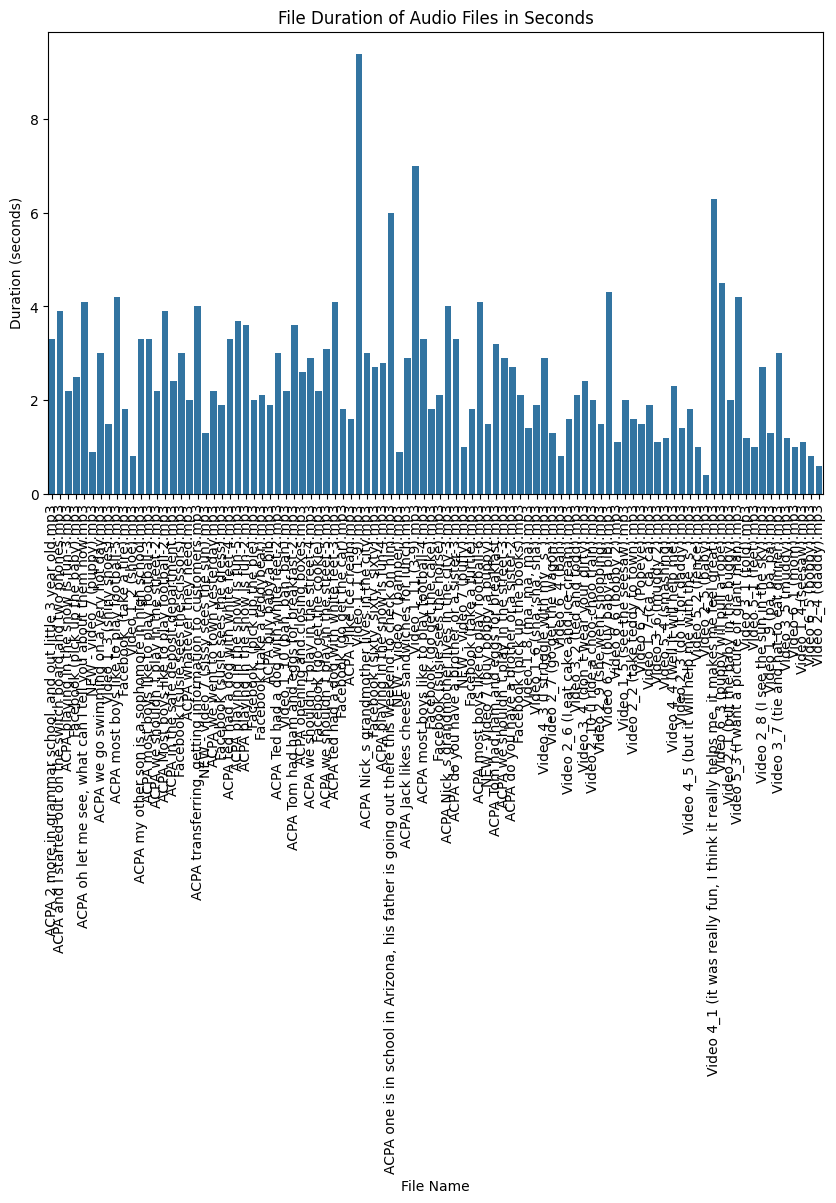

In [ ]:
# Visualization 1: Bar Plot of File Sizes in MB
plt.figure(figsize=(10, 6))
sns.barplot(x='File Name', y='Duration (seconds)', data=cases_df)
plt.xticks(rotation=90)
plt.title('File Duration of Audio Files in Seconds')
plt.ylabel('Duration (seconds)')
plt.xlabel('File Name')
plt.show()


In [ ]:
import os
from IPython.display import Audio

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CASES'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Define a function to play audio with descriptions
def play_audio_with_description(file_name):
    file_path = os.path.join(folder_path, file_name)
    print(f"Playing file: {file_name}\n\n")  # Display the file name or any other description
    display(Audio(file_path))

# Example: Play a specific file with its description
play_audio_with_description(mp3_files[90])

Playing file: Video 3_7 (tie and hat to eat dinner).mp3




Visualizing file: Video 3_7 (tie and hat to eat dinner).mp3


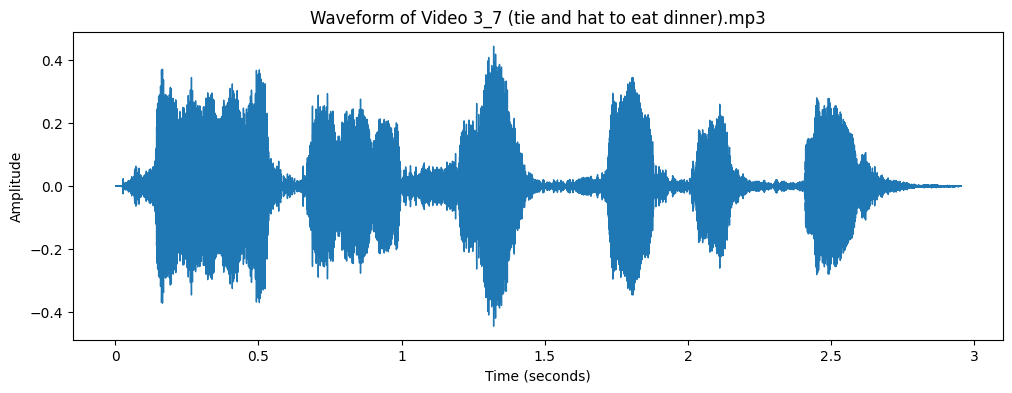

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CASES'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Define a function to visualize audio waveform with descriptions
def visualize_audio_waveform(file_name):
    file_path = os.path.join(folder_path, file_name)
    print(f"Visualizing file: {file_name}")

    # Load the audio file
    audio, sample_rate = librosa.load(file_path)

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title(f'Waveform of {file_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()

# Example: Visualize the waveform of a specific file
visualize_audio_waveform(mp3_files[90])  # Replace 90 with the index of the file you want to visualize


In [ ]:
import os
from pydub import AudioSegment
import librosa

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CASES'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Define a function to analyze audio file properties
def analyze_audio_file(file_name):
    file_path = os.path.join(folder_path, file_name)

    # Using pydub to check the number of channels
    audio_segment = AudioSegment.from_file(file_path)
    channels = audio_segment.channels

    # Using librosa to load audio and check the sampling rate
    audio, sample_rate = librosa.load(file_path, sr=None)  # Load with original sample rate
    duration = librosa.get_duration(y=audio, sr=sample_rate)

    print(f"File: {file_name}")
    print(f"Sampling Rate: {sample_rate} Hz")
    print(f"Channels (1 for mono, 2 for stereo): {channels} ")
    print(f"Duration: {duration:.2f} seconds")
    print("\n")

# Example: Analyze a specific file
analyze_audio_file(mp3_files[1])

File: ACPA and I started out on the switch board and two phones.mp3
Sampling Rate: 44100 Hz
Channels (1 for mono, 2 for stereo): 1 
Duration: 3.89 seconds




Sampling Rate: The file has a sampling rate of 44,100 Hz (Hertz). This is a standard and high-quality sampling rate for audio files. A high sampling rate like this captures a wide range of audio frequencies and is more than sufficient for speech recognition tasks.

Channels: This audio file is mono, as indicated by "1" under channels. Mono (monaural) audio means the sound is recorded into a single channel. This is ideal for speech recognition applications, including Whisper, as it simplifies the audio processing and is typically preferred over stereo for this kind of task.

Duration: The duration of the audio file is approximately 3.89 seconds. This is a relatively short duration, making it suitable for processing in speech recognition models. Shorter audio clips can be easier to work with and analyze for speech recognition purposes.

In [ ]:
import os
from pydub import AudioSegment
import librosa
import pandas as pd

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CASES'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Modify the function to return audio file properties instead of printing
def analyze_audio_file(file_name):
    file_path = os.path.join(folder_path, file_name)

    # Using pydub to check the number of channels
    audio_segment = AudioSegment.from_file(file_path)
    channels = audio_segment.channels

    # Using librosa to load audio and check the sampling rate
    audio, sample_rate = librosa.load(file_path, sr=None)  # Load with original sample rate
    duration = librosa.get_duration(y=audio, sr=sample_rate)

    return {
        "File Name": file_name,
        "Sampling Rate (Hz)": sample_rate,
        "Channels": channels,
        "Duration (seconds)": round(duration, 2)
    }

# Analyze all MP3 files and collect the data
audio_files_data = [analyze_audio_file(file) for file in mp3_files]

# Create the final DataFrame
df = pd.DataFrame(audio_files_data)

df


,File Name,Sampling Rate (Hz),Channels,Duration (seconds)
0,"ACPA 2 more in grammar school, and out little ...",44100,1,3.27
1,ACPA and I started out on the switch board and...,44100,1,3.89
2,ACPA playing in the snow is fun-3.mp3,48000,1,2.18
3,Facebook (pick up the baby).mp3,44100,1,2.51
4,"ACPA oh let me see, what can I tell you about ...",44100,1,4.13
...,...,...,...,...
91,Video 3_5 (muddy).mp3,44100,2,1.20
92,Video 6_1 (mom).mp3,44100,2,0.99
93,Video 1_4 (seesaw).mp3,44100,2,1.15
94,Video 6_5 (bobby).mp3,44100,2,0.84


In [ ]:
# Summary statistics
summary_stats = df.describe()

# Distributions
sampling_rate_dist = df['Sampling Rate (Hz)'].value_counts()
channels_dist = df['Channels'].value_counts()

summary_stats

,Sampling Rate (Hz),Channels,Duration (seconds)
count,96.000000,96.000000,96.000000
mean,44790.625000,1.489583,2.501771
std,1496.598116,0.502516,1.436129
min,44100.000000,1.000000,0.440000
25%,44100.000000,1.000000,1.482500
50%,44100.000000,1.000000,2.165000
75%,44100.000000,2.000000,3.207500
max,48000.000000,2.000000,9.350000


<ipython-input-11-00acd7d736fc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=sampling_rate_dist.index, y=sampling_rate_dist.values, palette="viridis")
<ipython-input-11-00acd7d736fc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=channels_dist.index, y=channels_dist.values, palette="cubehelix")


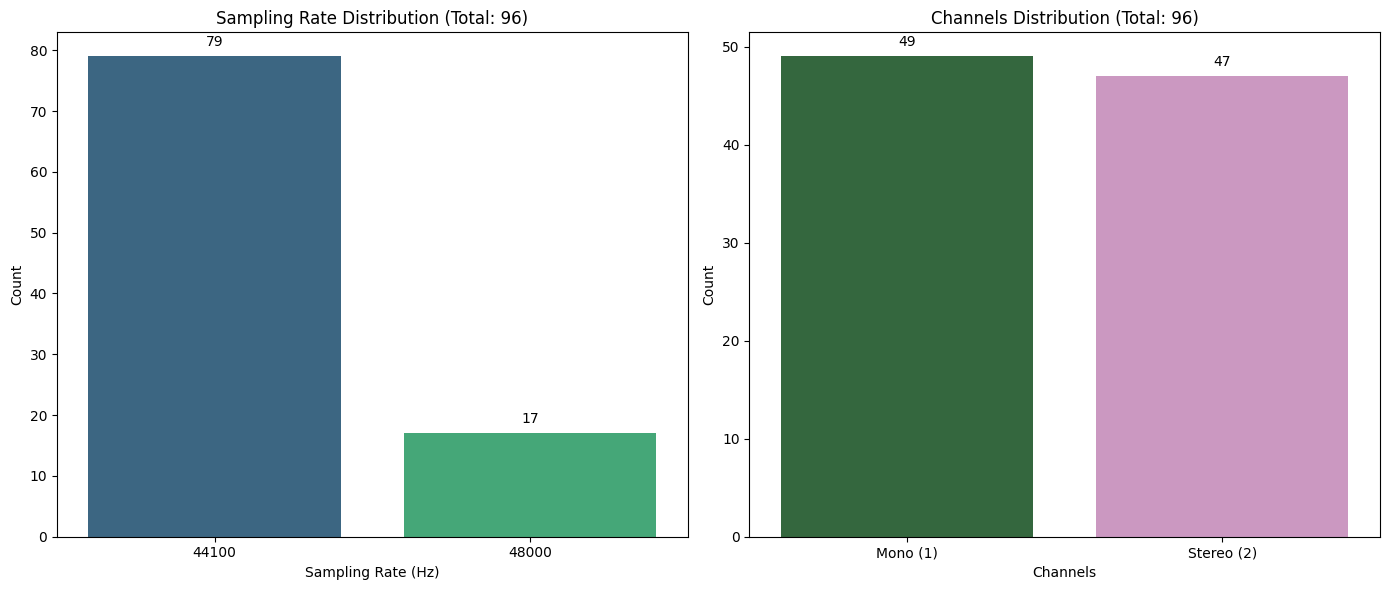

In [ ]:
# Function to add labels with whole numbers to the bars in the bar graph
def add_labels_whole_numbers(ax, spacing=5):
    for rect in ax.patches:
        height = int(rect.get_height())  # Convert to integer for whole numbers
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, spacing),  # Spacing between labels and bars
                    textcoords="offset points",
                    ha='center', va='bottom')

# Creating the bar graphs with whole number labels
plt.figure(figsize=(14, 6))

# Sampling Rate Distribution with whole number labels
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=sampling_rate_dist.index, y=sampling_rate_dist.values, palette="viridis")
add_labels_whole_numbers(ax1)
plt.title(f'Sampling Rate Distribution (Total: {int(sampling_rate_dist.sum())})')
plt.xlabel('Sampling Rate (Hz)')
plt.ylabel('Count')

# Channels Distribution with whole number labels
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=channels_dist.index, y=channels_dist.values, palette="cubehelix")
add_labels_whole_numbers(ax2)
plt.title(f'Channels Distribution (Total: {int(channels_dist.sum())})')
plt.xlabel('Channels')
plt.ylabel('Count')
plt.xticks([0, 1], ['Mono (1)', 'Stereo (2)'])

plt.tight_layout()
plt.show()

# Current Data Status
- Sampling Rates are mostly 44,100 Hz or 48,000 Hz, which are high-quality rates and likely acceptable.
-Channels: We have a mix of mono and stereo files. Stereo files should be converted to mono.
- Duration: Most files have short durations (seconds range), which is typically fine.

# TO-DOs
- Convert files from stereo to mono
- convert file format from mp3 to wav

# Controls df

In [ ]:
# Step 2: Import necessary libraries
import os
import pandas as pd

# Step 3: Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CONTROLS'

# Step 4: List all files in the directory
files = os.listdir(folder_path)

# Step 5: Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Step 6: Create a DataFrame with the MP3 files
controls_df = pd.DataFrame(mp3_files, columns=['File Name'])

# Step 7: Display the DataFrame
controls_df

,File Name
0,ACPA I like school.mp3
1,ACPA she wore blue shoes-2.mp3
2,ACPA they feed seeds to birds.mp3
3,ACPA Most Boys Like to Play Football.mp3
4,ACPA Ted had a dog with white feet.mp3
...,...
83,Video 1_6 (good).mp3
84,Video 1_4 (and can I have some more material).mp3
85,Video 1_5 (do you have a knife).mp3
86,Video 1_7 (here_s some pizza).mp3


In [ ]:
# Step 2: Import necessary libraries
import os
import pandas as pd
from mutagen.mp3 import MP3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Step 4: List all files in the directory
files = os.listdir(folder_path)


# Step 5: Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Step 6: Get file size and duration for each file
file_info = []
for file in mp3_files:
    path = os.path.join(folder_path, file)
    file_size = os.path.getsize(path)  # File size in bytes
    audio = MP3(path)
    duration = round(audio.info.length, 1)  # Duration in seconds, rounded to one decimal place

    file_info.append({'File Name': file, 'File Size (bytes)': file_size, 'Duration (seconds)': duration})

# Step 7: Create a DataFrame
controls_df = pd.DataFrame(file_info)
controls_df['File Size (MB)'] = controls_df['File Size (bytes)'] / (1024 * 1024)

controls_df

,File Name,File Size (bytes),Duration (seconds),File Size (MB)
0,ACPA I like school.mp3,37616,2.4,0.035873
1,ACPA she wore blue shoes-2.mp3,34272,2.1,0.032684
2,ACPA they feed seeds to birds.mp3,47647,3.0,0.045440
3,ACPA Most Boys Like to Play Football.mp3,48901,3.1,0.046636
4,ACPA Ted had a dog with white feet.mp3,66873,4.2,0.063775
...,...,...,...,...
83,Video 1_6 (good).mp3,12120,0.8,0.011559
84,Video 1_4 (and can I have some more material).mp3,57678,3.6,0.055006
85,Video 1_5 (do you have a knife).mp3,27167,1.7,0.025908
86,Video 1_7 (here_s some pizza).mp3,33854,2.1,0.032286


In [ ]:
# Calculate summary statistics for relevant columns
summary_stats_bytes = controls_df[['File Size (bytes)', 'Duration (seconds)']].describe().round(2)
summary_stats_bytes

,File Size (bytes),Duration (seconds)
count,88.00,88.00
mean,35768.23,2.23
std,20450.89,1.28
min,8777.00,0.50
25%,21733.00,1.40
50%,34063.00,2.10
75%,43885.00,2.70
max,127059.00,7.90


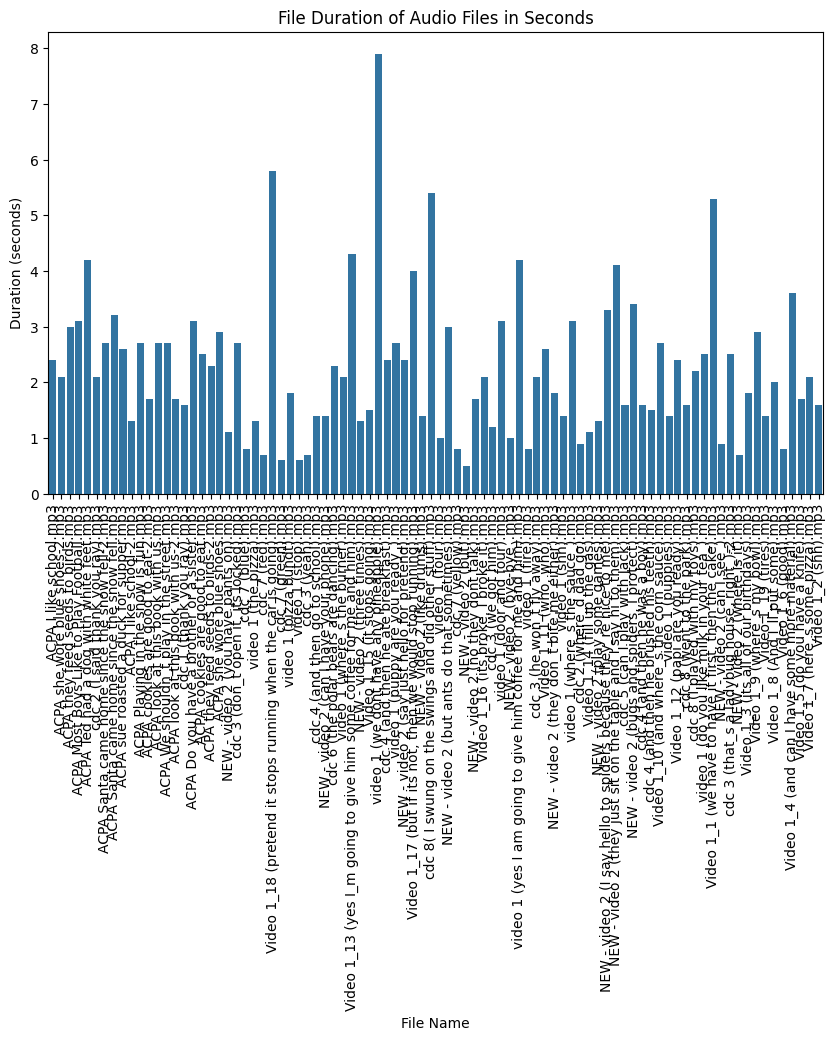

In [ ]:
# Visualization 1: Bar Plot of File Sizes in MB
plt.figure(figsize=(10, 6))
sns.barplot(x='File Name', y='Duration (seconds)', data=controls_df)
plt.xticks(rotation=90)
plt.title('File Duration of Audio Files in Seconds')
plt.ylabel('Duration (seconds)')
plt.xlabel('File Name')
plt.show()


In [ ]:
import os
from IPython.display import Audio

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CONTROLS'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Define a function to play audio with descriptions
def play_audio_with_description(file_name):
    file_path = os.path.join(folder_path, file_name)
    print(f"Playing file: {file_name}\n\n")  # Display the file name or any other description
    display(Audio(file_path))

# Example: Play a specific file with its description
play_audio_with_description(mp3_files[1])

Playing file: ACPA she wore blue shoes-2.mp3




Visualizing file: ACPA she wore blue shoes-2.mp3


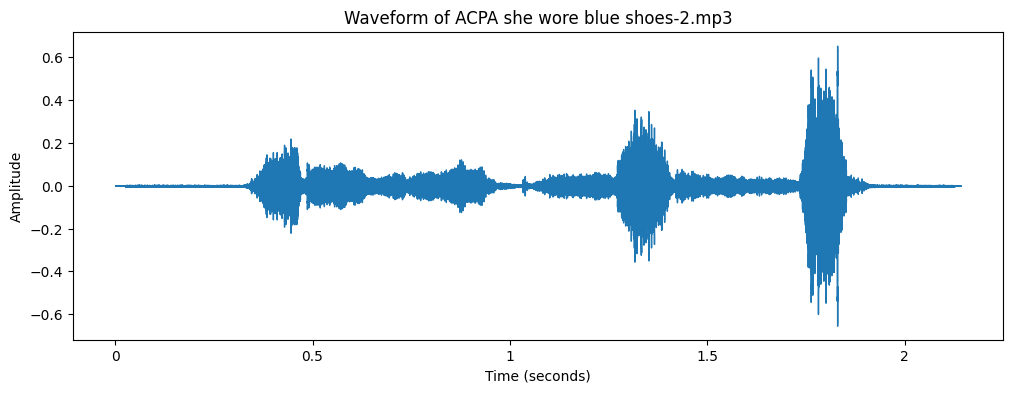

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CONTROLS'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Define a function to visualize audio waveform with descriptions
def visualize_audio_waveform(file_name):
    file_path = os.path.join(folder_path, file_name)
    print(f"Visualizing file: {file_name}")

    # Load the audio file
    audio, sample_rate = librosa.load(file_path)

    # Plot the waveform
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(audio, sr=sample_rate)
    plt.title(f'Waveform of {file_name}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()

# Example: Visualize the waveform of a specific file
visualize_audio_waveform(mp3_files[1])  # Replace 90 with the index of the file you want to visualize


In [ ]:
import os
from pydub import AudioSegment
import librosa
import pandas as pd

# Define the folder path
folder_path = '/content/drive/MyDrive/VUMC_postcleft/PUBLIC SAMPLES/CONTROLS'

# List all files in the directory
files = os.listdir(folder_path)

# Filter out MP3 files
mp3_files = [file for file in files if file.endswith('.mp3')]

# Modify the function to return audio file properties instead of printing
def analyze_audio_file(file_name):
    file_path = os.path.join(folder_path, file_name)

    # Using pydub to check the number of channels
    audio_segment = AudioSegment.from_file(file_path)
    channels = audio_segment.channels

    # Using librosa to load audio and check the sampling rate
    audio, sample_rate = librosa.load(file_path, sr=None)  # Load with original sample rate
    duration = librosa.get_duration(y=audio, sr=sample_rate)

    return {
        "File Name": file_name,
        "Sampling Rate (Hz)": sample_rate,
        "Channels": channels,
        "Duration (seconds)": round(duration, 2)
    }

# Analyze all MP3 files and collect the data
audio_files_data = [analyze_audio_file(file) for file in mp3_files]

# Create the final DataFrame
df = pd.DataFrame(audio_files_data)

df


,File Name,Sampling Rate (Hz),Channels,Duration (seconds)
0,ACPA I like school.mp3,44100,1,2.35
1,ACPA she wore blue shoes-2.mp3,44100,1,2.14
2,ACPA they feed seeds to birds.mp3,44100,1,2.98
3,ACPA Most Boys Like to Play Football.mp3,44100,1,3.06
4,ACPA Ted had a dog with white feet.mp3,44100,1,4.18
...,...,...,...,...
83,Video 1_6 (good).mp3,44100,2,0.76
84,Video 1_4 (and can I have some more material).mp3,44100,2,3.60
85,Video 1_5 (do you have a knife).mp3,44100,2,1.70
86,Video 1_7 (here_s some pizza).mp3,44100,2,2.12


In [ ]:
# Summary statistics
summary_stats = df.describe()

# Distributions
sampling_rate_dist = df['Sampling Rate (Hz)'].value_counts()
channels_dist = df['Channels'].value_counts()

summary_stats

,Sampling Rate (Hz),Channels,Duration (seconds)
count,88.0,88.000000,88.000000
mean,44100.0,1.795455,2.235682
std,0.0,0.405681,1.277985
min,44100.0,1.000000,0.550000
25%,44100.0,2.000000,1.360000
50%,44100.0,2.000000,2.130000
75%,44100.0,2.000000,2.740000
max,44100.0,2.000000,7.940000


<ipython-input-15-00acd7d736fc>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=sampling_rate_dist.index, y=sampling_rate_dist.values, palette="viridis")
<ipython-input-15-00acd7d736fc>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=channels_dist.index, y=channels_dist.values, palette="cubehelix")


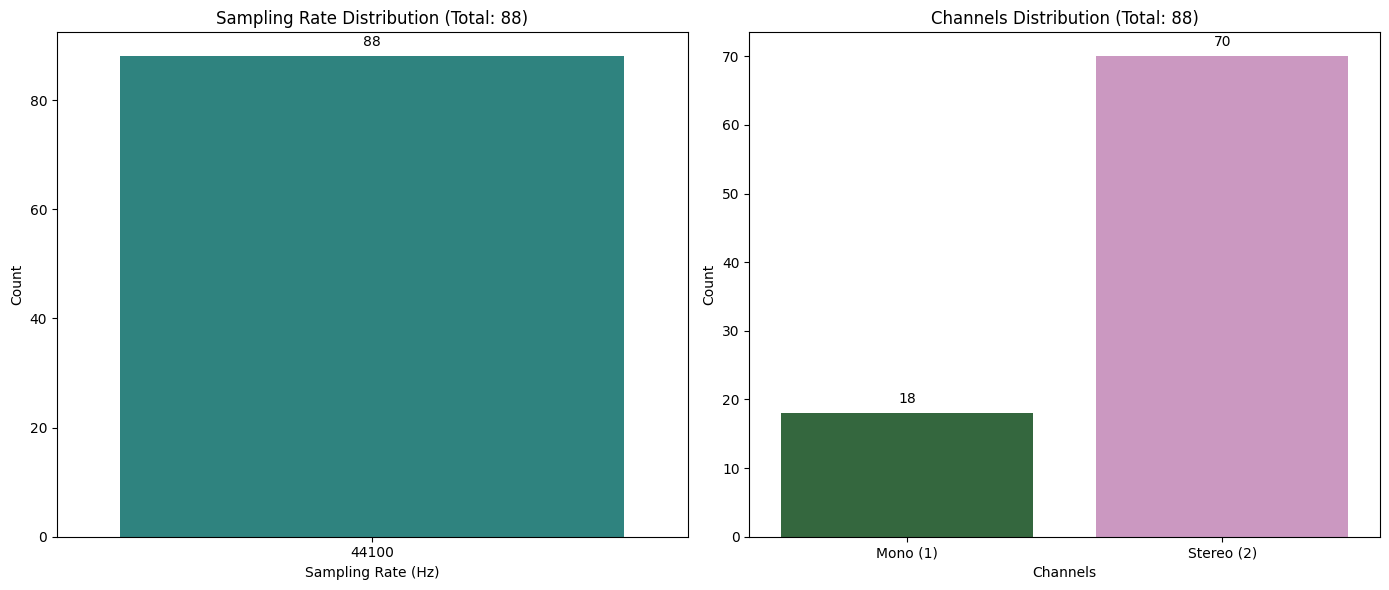

In [ ]:
# Function to add labels with whole numbers to the bars in the bar graph
def add_labels_whole_numbers(ax, spacing=5):
    for rect in ax.patches:
        height = int(rect.get_height())  # Convert to integer for whole numbers
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, spacing),  # Spacing between labels and bars
                    textcoords="offset points",
                    ha='center', va='bottom')

# Creating the bar graphs with whole number labels
plt.figure(figsize=(14, 6))

# Sampling Rate Distribution with whole number labels
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=sampling_rate_dist.index, y=sampling_rate_dist.values, palette="viridis")
add_labels_whole_numbers(ax1)
plt.title(f'Sampling Rate Distribution (Total: {int(sampling_rate_dist.sum())})')
plt.xlabel('Sampling Rate (Hz)')
plt.ylabel('Count')

# Channels Distribution with whole number labels
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=channels_dist.index, y=channels_dist.values, palette="cubehelix")
add_labels_whole_numbers(ax2)
plt.title(f'Channels Distribution (Total: {int(channels_dist.sum())})')
plt.xlabel('Channels')
plt.ylabel('Count')
plt.xticks([0, 1], ['Mono (1)', 'Stereo (2)'])

plt.tight_layout()
plt.show()